# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [44]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate 

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

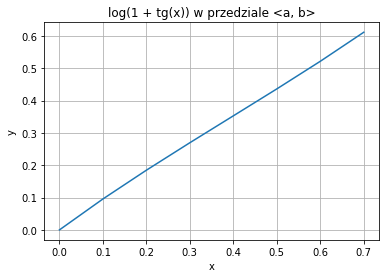

<ipython-input-45-a34c4caf02e0>:1: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(1 + np.tan(x))


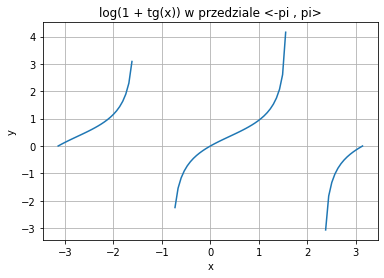

In [45]:
f = lambda x: np.log(1 + np.tan(x))
dx = 0.1
x = np.arange(0, np.pi/4, dx)
new_x = np.linspace(-np.pi, np.pi, 100)

plt.plot(x, f(x))
plt.title("log(1 + tg(x)) w przedziale <a, b>")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

plt.plot(new_x, f(new_x))
plt.title("log(1 + tg(x)) w przedziale <-pi , pi>")
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.show()

Jak możemy zauważyć w przedziale <a,b> funkcja spełnia wymagania dotyczące całkowania, ponieważ jest: ciągła, różniczkowalna i  ciągła. Lecz nie możemy całkować tej funckji w dowolnym przedziale, ponieważ jak możemy zauważyć już na przedziale <-pi, pi> funkcja nie wszędzie spełnia wymagania całkowania.

Metoda trapezów

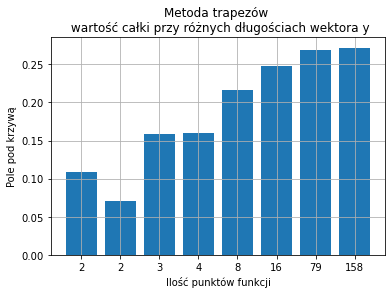

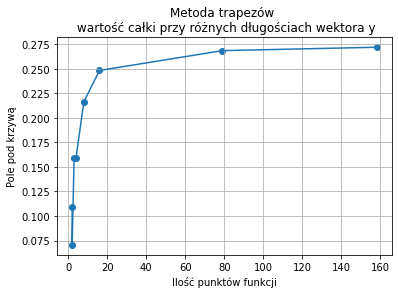

In [46]:
dx = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005]
trapz_area = []
dx_area = []
x_len = []
for i in dx:
    x = np.arange(0, np.pi/4, i)
    trapz_area.append(sp.integrate.trapz(f(x), x))
    x_len.append(len(x))

plt.bar(range(len(trapz_area)), trapz_area)
plt.xticks(range(len(trapz_area)), (str(i) for i in x_len))
plt.title("Metoda trapezów \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

plt.scatter(x_len,trapz_area)
plt.plot(x_len,trapz_area)
plt.title("Metoda trapezów \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

Wraz ze wzrostem długości wektora y rośnie wartość pola pod krzywą - otrzymujemy dokładniejszą wartość.

[27.192235467498225, 2.7192235467498227, 0.27192235467498227, 0.02719223546749823, 0.002719223546749823, 0.00027192235467498227]


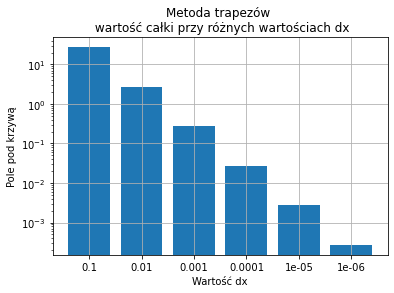

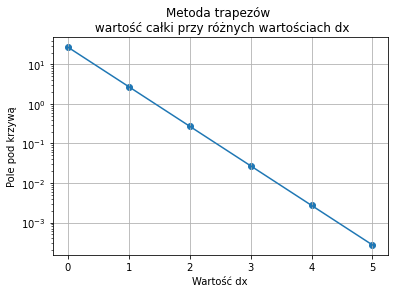

In [47]:
dx = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

trapz_area = []
x = np.arange(0, np.pi/4, 0.001)

for i in dx:
    trapz_area.append(sp.integrate.trapz(f(x), dx = i))

print(trapz_area)
plt.bar(range(len(dx)), trapz_area)
plt.xticks(range(len(dx)), (str(i) for i in dx))
plt.title("Metoda trapezów \n wartość całki przy różnych wartościach dx")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()


plt.scatter(range(len(dx)),trapz_area)
plt.plot(range(len(dx)),trapz_area)
plt.title("Metoda trapezów \n wartość całki przy różnych wartościach dx")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

Zły dobór wartości dx - czyli odległość między kolejnymi punktami wektora y, powoduje uzyskanie złego wyniku. Domyślnie wartość parametru dx jest ustawiona na 1.

Metoda Simpsona

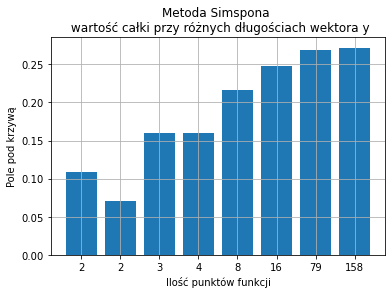

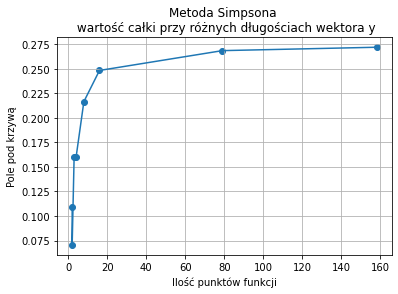

In [48]:
dx = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005]
simp_area = []
dx_area = []
x_len = []
for i in dx:
    x = np.arange(0, np.pi/4, i)
    simp_area.append(sp.integrate.simps(f(x), x))
    x_len.append(len(x))

plt.bar(range(len(simp_area)), simp_area)
plt.xticks(range(len(simp_area)), (str(i) for i in x_len))
plt.title("Metoda Simspona \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

plt.scatter(x_len,simp_area)
plt.plot(x_len,simp_area)
plt.title("Metoda Simpsona \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

Wraz ze zwiększaniem długości wektora, uzyskujemy dokładniejszy wynik. Przy 79 punktach wynik stabilizuje się.

[27.19223547080699, 2.719223547080699, 0.27192235470806986, 0.02719223547080699, 0.002719223547080699, 0.00027192235470806984]


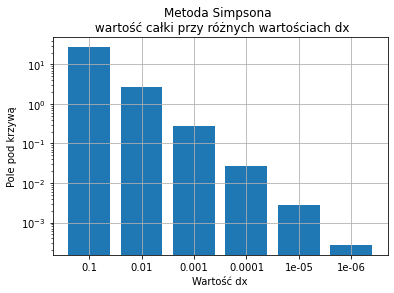

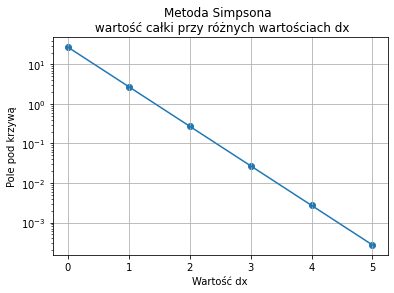

In [49]:
dx = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

simp_area = []
x = np.arange(0, np.pi/4, 0.001)

for i in dx:
    simp_area.append(sp.integrate.simps(f(x), dx = i))

print(simp_area)
plt.bar(range(len(dx)), simp_area)
plt.xticks(range(len(dx)), (str(i) for i in dx))
plt.title("Metoda Simpsona \n wartość całki przy różnych wartościach dx")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

plt.scatter(range(len(dx)),simp_area)
plt.plot(range(len(dx)),simp_area)
plt.title("Metoda Simpsona \n wartość całki przy różnych wartościach dx")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Wartość dx")
plt.yscale("log")
plt.grid()
plt.show()

Metoda Romberga

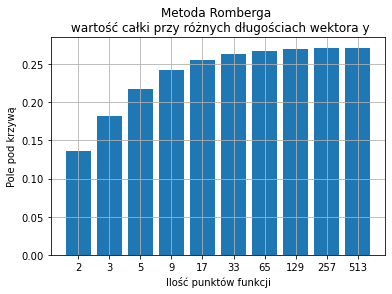

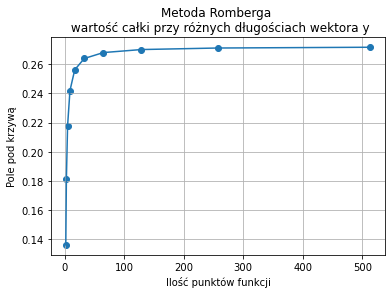

In [50]:
ddx = range(0, 10)

romb_area = []
x_len = []
for dx in ddx:
    x = np.linspace(0, np.pi/4, 2**dx + 1)
    romb_area.append(sp.integrate.romb(f(x), dx=np.pi/4/(2**dx + 1)))
    x_len.append(len(x))

plt.bar(range(len(romb_area)), romb_area)
plt.xticks(range(len(romb_area)), (str(i) for i in x_len))
plt.title("Metoda Romberga \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

plt.scatter(x_len,romb_area)
plt.plot(x_len,romb_area)
plt.title("Metoda Romberga \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

Błąd funkcji quadrature: 5.551115123125783e-17
Błąd funkcji quad: 3.022007769448168e-15


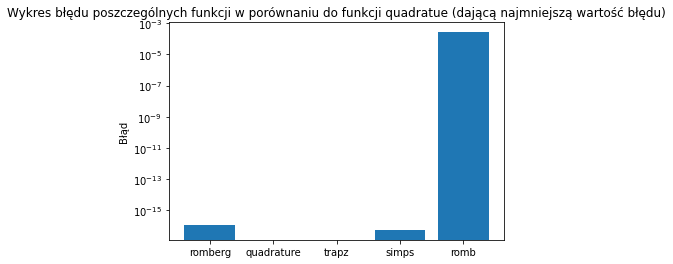

In [51]:
quadrature, q_err = scipy.integrate.quadrature(f, 0, np.pi/4)
romberg = scipy.integrate.romberg(f, 0, np.pi/4)
quad, quad_err = scipy.integrate.quad(f, 0, np.pi/4)

print(f"Błąd funkcji quadrature: {q_err}")
print(f"Błąd funkcji quad: {quad_err}")

x = np.linspace(0, np.pi/4, 2**10+1)
trapz = sp.integrate.trapz(f(x), x)
simps = sp.integrate.simps(f(x), x)
romb = sp.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))

labels = ['romberg', 'quadrature', 'trapz', 'simps', 'romb', ]
bars = np.abs(quadrature - np.array([romberg, quad, trapz, simps, romb]))
num_bars = np.arange(5)
plt.bar(num_bars, bars)
plt.xticks(num_bars, labels)
plt.yscale("log")
plt.title("Wykres błędu poszczególnych funkcji w porównaniu do funkcji quadratue (dającą najmniejszą wartość błędu)")
plt.ylabel("Błąd")

plt.show()

Najgorszy wynik uzyskujemy metodą romb. Reszta daje podobne wymiki.

Porównanie czasu wykonania poszczególnych metod

Metoda quadrature

In [52]:
%%timeit -r 100 -n 100
quadrature, q_err = scipy.integrate.quadrature(f, 0, np.pi/4)

64.9 µs ± 12.1 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Metoda Romberga

In [53]:
%%timeit -r 100 -n 100
romberg = scipy.integrate.romberg(f, 0, np.pi/4)

45.7 µs ± 9.26 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Metoda quad

In [54]:
%%timeit -r 100 -n 100
quad, quad_err = scipy.integrate.quad(f, 0, np.pi/4)

84.6 µs ± 14.4 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Metoda Trapz

In [55]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
trapz = sp.integrate.trapz(f(x), x)

The slowest run took 4.45 times longer than the fastest. This could mean that an intermediate result is being cached.
114 µs ± 40 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Metoda Simps

In [56]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
simps = sp.integrate.simps(f(x), x)

132 µs ± 20.8 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Metoda Romb

In [57]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**10+1)
romb = sp.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))

The slowest run took 5.98 times longer than the fastest. This could mean that an intermediate result is being cached.
265 µs ± 103 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


Najszybsza u mnie jest metoda Romberga, a następnie nie wiele wolniejsza jest metoda Quadrature. Najwolniejsza okazała się metoda Rombów

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

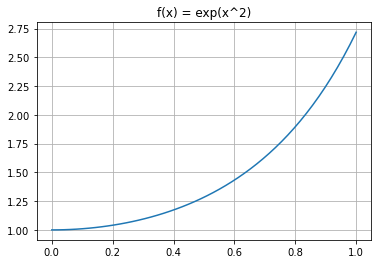

In [58]:
f = lambda x: np.exp(x**2)
x = np.linspace(0, 1) 
plt.plot(x, f(x))
plt.grid()
plt.title("f(x) = exp(x^2)")
plt.show()

Metoda Trapezów

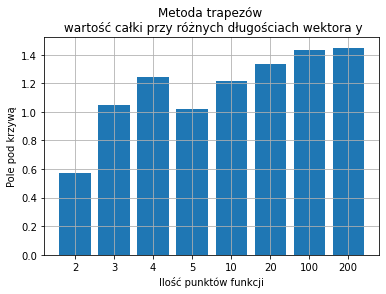

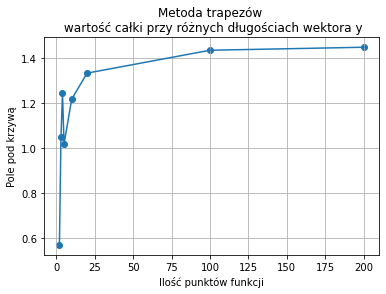

In [59]:
dx = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005]
trapz_area = []
dx_area = []
x_len = []
for i in dx:
    x = np.arange(0, 1, i)
    trapz_area.append(sp.integrate.trapz(f(x), x))
    x_len.append(len(x))

plt.bar(range(len(trapz_area)), trapz_area)
plt.xticks(range(len(trapz_area)), (str(i) for i in x_len))
plt.title("Metoda trapezów \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

plt.scatter(x_len,trapz_area)
plt.plot(x_len,trapz_area)
plt.title("Metoda trapezów \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

Metoda Simspona

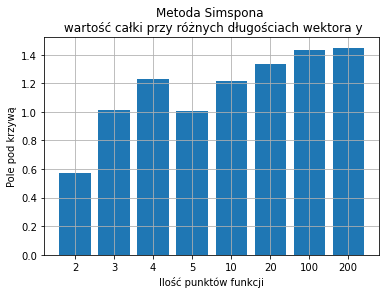

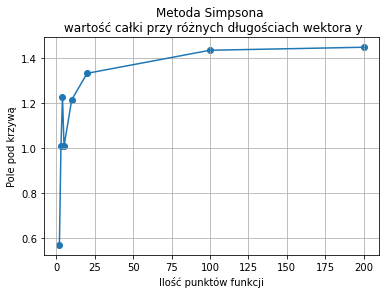

In [60]:
dx = [0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005]
simp_area = []
dx_area = []
x_len = []
for i in dx:
    x = np.arange(0, 1, i)
    simp_area.append(sp.integrate.simps(f(x), x))
    x_len.append(len(x))

plt.bar(range(len(simp_area)), simp_area)
plt.xticks(range(len(simp_area)), (str(i) for i in x_len))
plt.title("Metoda Simspona \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

plt.scatter(x_len,simp_area)
plt.plot(x_len,simp_area)
plt.title("Metoda Simpsona \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

Metoda Romberga

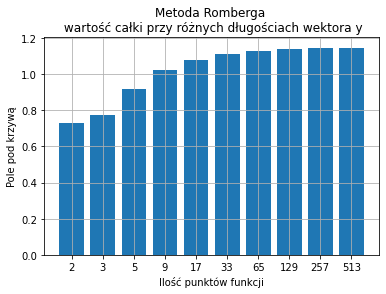

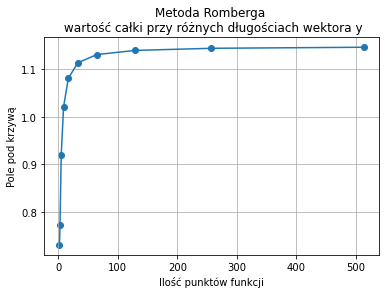

In [61]:
ddx = range(0, 10)

romb_area = []
x_len = []
for dx in ddx:
    x = np.linspace(0, 1, 2**dx + 1)
    romb_area.append(sp.integrate.romb(f(x), dx=np.pi/4/(2**dx + 1)))
    x_len.append(len(x))

plt.bar(range(len(romb_area)), romb_area)
plt.xticks(range(len(romb_area)), (str(i) for i in x_len))
plt.title("Metoda Romberga \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

plt.scatter(x_len,romb_area)
plt.plot(x_len,romb_area)
plt.title("Metoda Romberga \n wartość całki przy różnych długościach wektora y")
plt.ylabel("Pole pod krzywą")
plt.xlabel("Ilość punktów funkcji")
plt.grid()
plt.show()

Porównanie funckji

Błąd funkcji quadrature: 3.028743367217146e-09
Błąd funkcji quad: 1.0899588511894889e-14


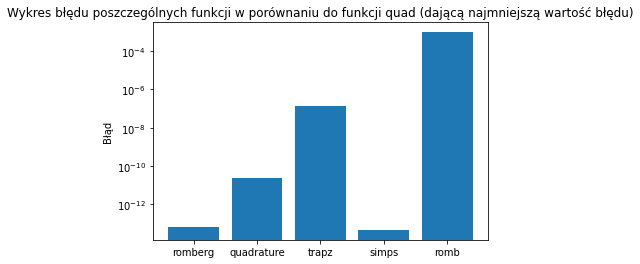

In [62]:
quadrature, q_err = scipy.integrate.quadrature(f, 0, np.pi/4)
romberg = scipy.integrate.romberg(f, 0, np.pi/4)
quad, quad_err = scipy.integrate.quad(f, 0, np.pi/4)

print(f"Błąd funkcji quadrature: {q_err}")
print(f"Błąd funkcji quad: {quad_err}")

x = np.linspace(0, np.pi/4, 2**10+1)
trapz = sp.integrate.trapz(f(x), x)
simps = sp.integrate.simps(f(x), x)
romb = sp.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))

labels = ['romberg', 'quadrature', 'trapz', 'simps', 'romb', ]
bars = np.abs(quad - np.array([romberg, quadrature, trapz, simps, romb]))
num_bars = np.arange(5)
plt.bar(num_bars, bars)
plt.xticks(num_bars, labels)
plt.yscale("log")
plt.title("Wykres błędu poszczególnych funkcji w porównaniu do funkcji quad (dającą najmniejszą wartość błędu)")
plt.ylabel("Błąd")

plt.show()

Najgorsze wyniki uzyskujemy metodami trpaz i romb. Metody simps i romberg dają najlesze wyniki.